In [2]:
import json
from collections import defaultdict
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re
import pandas as pd
from rliable import plot_utils
plt.rcParams['text.usetex'] = False #Let TeX do the typsetting
plt.rcParams['text.latex.preamble'] = r'\usepackage{sansmath} \sansmath' #Force sans-serif math mode (for axes labels)
plt.rcParams['font.family'] = 'sans-serif' # ... for regular text
plt.rcParams['font.sans-serif'] = ['Helveta Nue'] # Choose a nice font here
sns.set_style("whitegrid")

COLORS = ['#BBCC33', '#77AADD', '#44BB99',
           '#EEDD88', '#EE8866', '#FFAABB',
          '#99DDFF', '#44BB99', '#AAAA00',
          '#DDDDDD']
palette = sns.set_palette(COLORS)

/home/cmu/miniconda3/envs/test/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### (extrapolation) reward

In [3]:
reward = pd.read_csv('data/reward.csv')
extrapolation_reward = pd.read_csv('data/extrapolation_reward.csv')

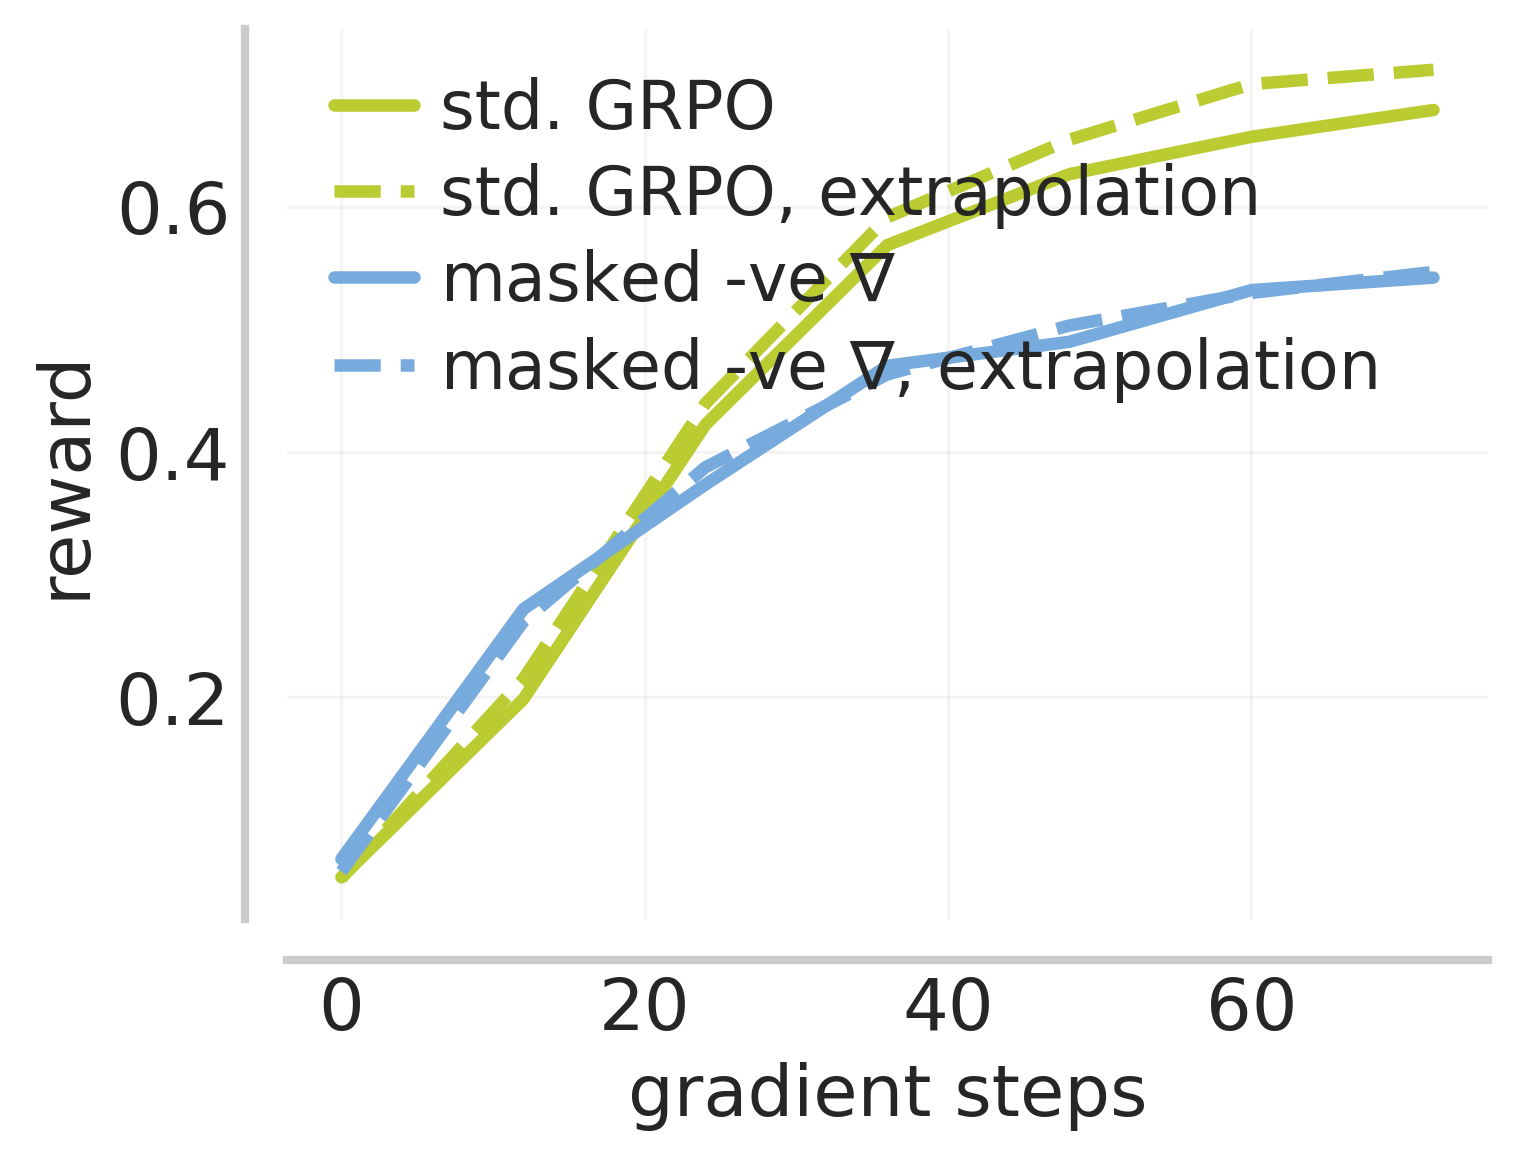

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=300)
fig.set_size_inches(496.0/192*2, 369.6/192*2)

sns.lineplot(data=reward, x='Step', y='normal - val/reward/5', ax=ax, linewidth=3, markersize=8, color=COLORS[0], label=r'std. GRPO')
sns.lineplot(data=extrapolation_reward, x='Step', y='normal - extrapolation_val/reward/5', ax=ax, linewidth=3, markersize=8, color=COLORS[0], linestyle='--', label=r'std. GRPO, extrapolation')

sns.lineplot(data=reward, x='Step', y='positive - val/reward/5', ax=ax, linewidth=3, markersize=8, color=COLORS[1], label=r'masked -ve $\nabla$')
sns.lineplot(data=extrapolation_reward, x='Step', y='positive - extrapolation_val/reward/5', ax=ax, linewidth=3, markersize=8, color=COLORS[1], linestyle='--', label=r'masked -ve $\nabla$, extrapolation')

plt.rcParams["legend.loc"] = "lower right"

plot_utils._annotate_and_decorate_axis(ax,
                                        xlabel='gradient steps',
                                        ylabel='reward',
                                        labelsize='xx-large',
                                        ticklabelsize='xx-large',
                                        grid_alpha=0.2,
                                        legend=True)
ax.legend(
    prop={'size': 16},         # Slightly smaller font
    ncol=1,                    # Keep 1 column
    frameon=False,             # No box
    handlelength=1.2,          # Shrink line length
    handletextpad=0.4,         # Shrink space between marker and text
    borderpad=0.2,             # Shrink border padding inside legend box
    labelspacing=0.3,          # Reduce vertical space between entries
    loc="upper left",                # Optional: auto position
    markerscale=0.8,            # Shrink marker size
    # bbox_to_anchor=(-0.1, 1)
)

plt.savefig("plots/ng_countdown_reward.pdf", bbox_inches='tight',pad_inches=0)
plt.show()

### OOD (extrapolation) reward

In [5]:
ood_reward = pd.read_csv('data/ood_reward.csv')
extrapolation_ood_reward = pd.read_csv('data/extrapolation_ood_reward.csv')

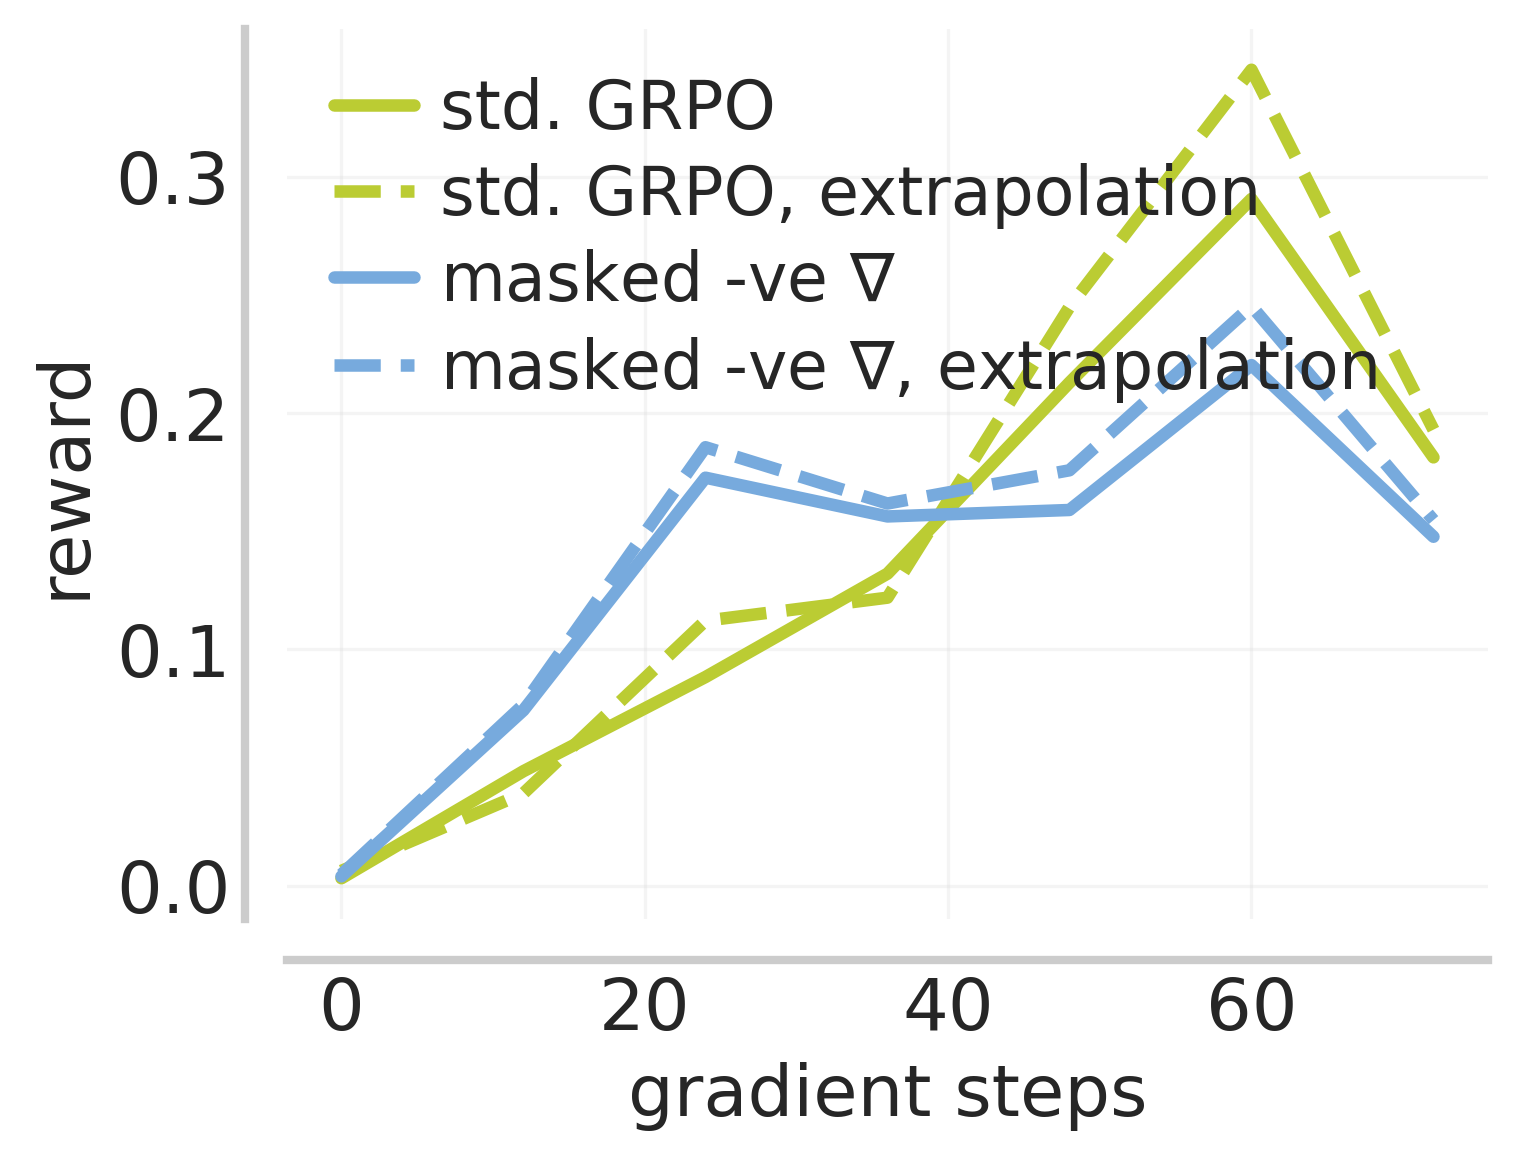

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=300)
fig.set_size_inches(496.0/192*2, 369.6/192*2)

sns.lineplot(data=ood_reward, x='Step', y='normal - val/reward/6', ax=ax, linewidth=3, markersize=8, color=COLORS[0], label=r'std. GRPO')
sns.lineplot(data=extrapolation_ood_reward, x='Step', y='normal - extrapolation_val/reward/6', ax=ax, linewidth=3, markersize=8, color=COLORS[0], linestyle='--', label=r'std. GRPO, extrapolation')

sns.lineplot(data=ood_reward, x='Step', y='positive - val/reward/6', ax=ax, linewidth=3, markersize=8, color=COLORS[1], label=r'masked -ve $\nabla$')
sns.lineplot(data=extrapolation_ood_reward, x='Step', y='positive - extrapolation_val/reward/6', ax=ax, linewidth=3, markersize=8, color=COLORS[1], linestyle='--', label=r'masked -ve $\nabla$, extrapolation')

plt.rcParams["legend.loc"] = "upper left"

plot_utils._annotate_and_decorate_axis(ax,
                                        xlabel='gradient steps',
                                        ylabel='reward',
                                        labelsize='xx-large',
                                        ticklabelsize='xx-large',
                                        grid_alpha=0.2,
                                        legend=True)
ax.legend(
        prop={'size': 16},         # Slightly smaller font
        ncol=1,                    # Keep 1 column
        frameon=False,             # No box
        handlelength=1.2,          # Shrink line length
        handletextpad=0.4,         # Shrink space between marker and text
        borderpad=0.2,             # Shrink border padding inside legend box
        labelspacing=0.3,          # Reduce vertical space between entries
        loc="upper left",                # Optional: auto position
        markerscale=0.8,            # Shrink marker size
        # bbox_to_anchor=(-0.1, 1)
    )

plt.savefig("plots/ng_countdown_ood_reward.pdf", bbox_inches='tight',pad_inches=0)
plt.show()